In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('float_format', '{:f}'.format)

In [2]:
#loading the data for analysis
data = pd.read_csv("Youtube_Trending_data_15thNov.csv")

In [3]:
#Let's preview the data
data.head()

,title,description,channelTitle,tags,categoryId,liveBroadcastContent,defaultLanguage,defaultAudioLanguage,viewCount,likeCount,...,definition,caption,licensedContent,projection,hrs_duration,min_duration,sec_duration,video_duration,publishedDATE,publishedTIME
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,Fortified by terrestrial powers and feared by ...,APATATV+,'latest yoruba movie 2021 new release this wee...,Entertainment,none,en,yo,559061.000000,4325.000000,...,hd,False,True,rectangular,1,4,43,01:04:43,2021-11-08,13:00:12
1,Liberia v Nigeria | FIFA World Cup Qatar 2022 ...,Victor Osimhen and Ahmed Musa both struck from...,FIFATV,"'Football', 'FIFA', 'official', 'Soccer', 'Fut...",Sports,none,en,en,283842.000000,3558.000000,...,hd,False,True,rectangular,0,2,10,00:02:10,2021-11-13,18:38:29
2,The Cokers Latest Yoruba Movie 2021 Drama Star...,A gripping story about a famous and wealthy in...,Yorubaplus,"'latest yoruba movies 2021 new release', 'yoru...",Entertainment,none,yo,yo,659152.000000,5825.000000,...,hd,False,True,rectangular,1,32,54,01:32:54,2021-11-05,09:30:01
3,IZZAR SO EPISODE 65 ORIGINAL,Wannan Channel Bakori tv Zata Rika Kawo Muku S...,BAKORI TV,"'Broda Shaggi', 'BrodaShaggi', 'Fine boy Agber...",Entertainment,none,en,en-GB,447119.000000,10708.000000,...,hd,False,True,rectangular,0,42,6,00:42:06,2021-11-07,18:58:10
4,ONCE UPON A BAD DAY | BRODASHAGGI | CHIOMA AKP...,Please SUBSCRIBE to Broda Shaggi Official YouT...,official BRODA SHAGGI,"'SuperSport', 'SuperSport live', 'supersport t...",Comedy,none,en,en-GB,660109.000000,27183.000000,...,hd,False,True,rectangular,0,11,39,00:11:39,2021-11-03,23:00:13


# In this analysis we are trying to figure out why this particular videos are the current trending videos on youtube on the 14th November, 2021

# To carry out this analysis we are going to ask a few questions because the more the questions the better the anaylysis.
## 1. How many Channels belonged to different categories(entertainment,sports, etc.)
## 2. Frequency of each channel(finding out whether a channel had more than a video on the trending list).
## 3. Which channel had the most views.
## 4. Which categories generated the most interactions.
## 5. What type of content trended the most.

## We are going to start with checking the shape of the dataset

In [4]:
# Checking for the shape of the data
data.shape

(50, 24)

### This data is just for a day, that is why we have just 50 records in total.
### It is quite interesting how we have 24 columns

In [119]:
#checking for missing values that could mess with the analysis
missing_count = data.isnull().sum()
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing,
                                 'missing_count': missing_count})

missing_value_df["percent_missing"] = missing_value_df["percent_missing"].astype(int)
missing_value_df.sort_values(by='percent_missing',ascending=False,inplace=True)  
missing_value_df                     

,column_name,percent_missing,missing_count
likeCount,likeCount,4,2
dislikeCount,dislikeCount,4,2
commentCount,commentCount,4,2
title,title,0,0
licensedContent,licensedContent,0,0
publishedDATE,publishedDATE,0,0
video_duration,video_duration,0,0
sec_duration,sec_duration,0,0
min_duration,min_duration,0,0
hrs_duration,hrs_duration,0,0


#### the only values with missing values are:
#### 1. defaultLanguage             
#### 2. defaultAudioLanguage
#### 3. tags
#### 4. description
#### 5. commentCount
#### 6. likeCount
#### 7. dislikeCount

##### " defaultLanguage " has more than 50% of it missing, I recommend dropping this column and not using it for analysis



In [6]:
bool_series = pd.isnull(data["dislikeCount"])
data["likeCount"][bool_series]

48   nan
49   nan
Name: likeCount, dtype: float64

In [9]:
#dropping columns with lots of missing values
data.drop(["defaultLanguage","defaultAudioLanguage","tags","description"],axis=1,inplace=True)

In [10]:
missing_count_new = data.isnull().sum()
percent_missing_new = data.isnull().sum() * 100 / len(data)
missing_value_new = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing_new': percent_missing_new,
                                 'missing_count_new': missing_count_new})

missing_value_new["percent_missing_new"] = missing_value_new["percent_missing_new"].astype(int)
missing_value_new.sort_values(by='percent_missing_new',ascending=False,inplace=True)  
missing_value_new       

,column_name,percent_missing_new,missing_count_new
likeCount,likeCount,4,2
dislikeCount,dislikeCount,4,2
commentCount,commentCount,4,2
title,title,0,0
licensedContent,licensedContent,0,0
publishedDATE,publishedDATE,0,0
video_duration,video_duration,0,0
sec_duration,sec_duration,0,0
min_duration,min_duration,0,0
hrs_duration,hrs_duration,0,0


## Investigating suspicious looking columns 

In [11]:
#looking for the row index with missing values
likecnt_bool_series = pd.isnull(data["likeCount"])
data["likeCount"][likecnt_bool_series]

48   nan
49   nan
Name: likeCount, dtype: float64

In [12]:
#looking for the row index with missing values
dslikecnt_bool_series = pd.isnull(data["dislikeCount"])
data["dislikeCount"][dslikecnt_bool_series]

48   nan
49   nan
Name: dislikeCount, dtype: float64

In [13]:
#looking for the row index with missing values
cmntcnt_bool_series = pd.isnull(data["commentCount"])
data["commentCount"][cmntcnt_bool_series]

48   nan
49   nan
Name: commentCount, dtype: float64

### When likeCount,dislikeCount,commentCount had the same number missing values, I got curious and while looking into which datapoints were missing I realised that it was 2 particular videos. I will be looking deeper into the videos

In [14]:
#locating the datapoints by their respective index
data.iloc [[48,49]]

,title,channelTitle,categoryId,liveBroadcastContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,dimension,definition,caption,licensedContent,projection,hrs_duration,min_duration,sec_duration,video_duration,publishedDATE,publishedTIME
48,AFRICAN HOME: RECONCILIATION,SamSpedy,Comedy,none,1237714.000000,nan,nan,0.000000,nan,2d,hd,False,True,rectangular,0,10,58,00:10:58,2021-11-05,17:20:46
49,MOTHER OF SEVEN (NEW COMPLETE MOVIE) - STEPHEN...,Starconnecttv,Entertainment,none,279845.000000,nan,nan,0.000000,nan,2d,hd,False,True,rectangular,3,11,42,03:11:42,2021-10-31,17:00:23


## Now let us check the different data types we would be working with

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 50 non-null     object 
 1   channelTitle          50 non-null     object 
 2   categoryId            50 non-null     object 
 3   liveBroadcastContent  50 non-null     object 
 4   viewCount             50 non-null     float64
 5   likeCount             48 non-null     float64
 6   dislikeCount          48 non-null     float64
 7   favoriteCount         50 non-null     float64
 8   commentCount          48 non-null     float64
 9   dimension             50 non-null     object 
 10  definition            50 non-null     object 
 11  caption               50 non-null     bool   
 12  licensedContent       50 non-null     bool   
 13  projection            50 non-null     object 
 14  hrs_duration          50 non-null     int64  
 15  min_duration          50 

## Majority of the column had a data type of "object", 
## for the "bool" data type, I found out that they all had a single value hence it is redundant to our analysis

In [22]:
data_sorted = data.sort_values("categoryId")


Text(0, 0.5, 'Channels')

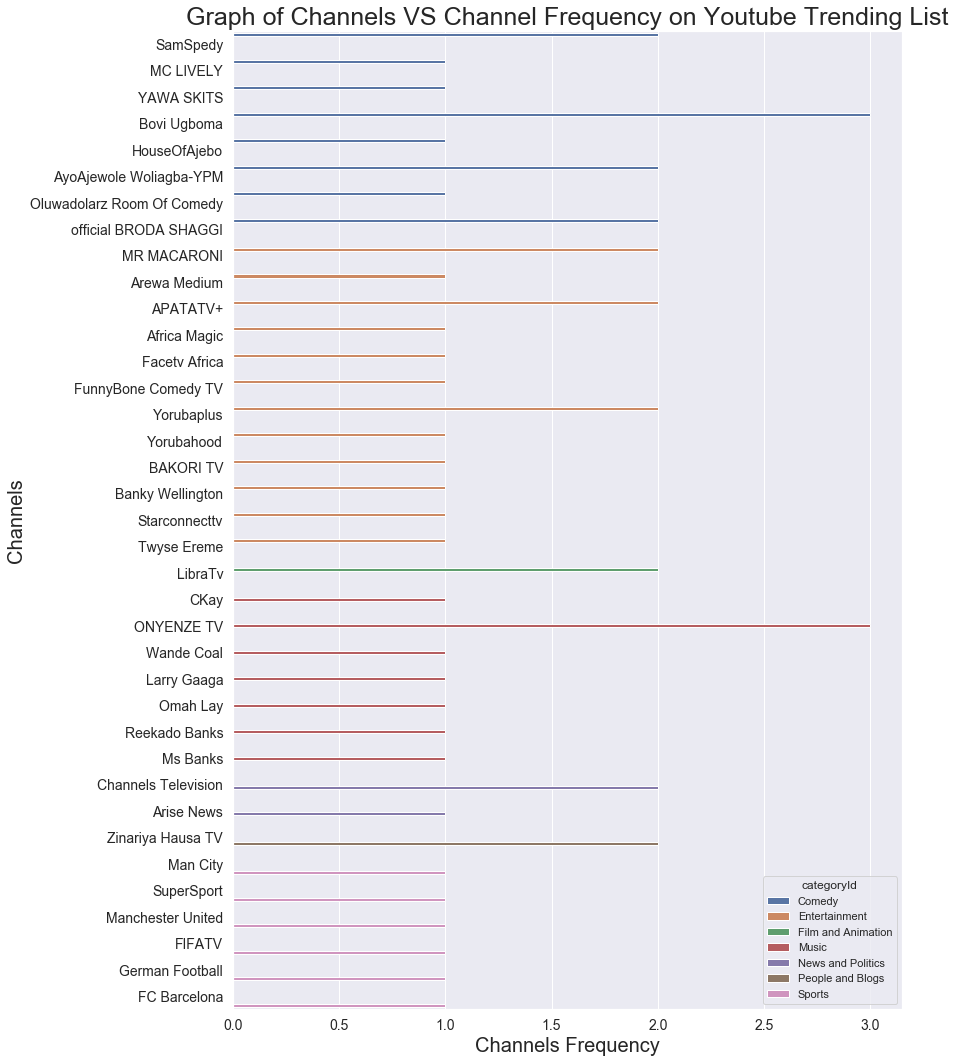

In [23]:
# this puts videos of same categories together so that it could be easily visualized 
sns.set(rc={'figure.figsize':(12,18)})
plt.xticks(size=14)
plt.yticks(size=14)
my_plot = sns.countplot(y=data_sorted["channelTitle"],hue=data_sorted["categoryId"],orient="h")
my_plot.axes.set_title("Graph of Channels VS Channel Frequency on Youtube Trending List",fontsize=25)
my_plot.set_xlabel("Channels Frequency",fontsize=20)
my_plot.set_ylabel("Channels",fontsize=20)


# <u> Insights </u>
## *ONYENZE TV* and *BOVI UGBOMA* had up to 3 videos on the trending list, with them belonging to the Music and Comedy categories respectively

In [26]:
#this answers how many channels belong in each category
data.groupby(["channelTitle"])["categoryId"].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Entertainment]         12
[Comedy]                 8
[Music]                  7
[Sports]                 6
[News and Politics]      2
[Film and Animation]     1
[People and Blogs]       1
Name: categoryId, dtype: int64

# <u> Insights </u>
## *Entertainment* videos trended the most followed by music and sports which actually makes sense since we saw a number of "TV" channels

In [27]:
vid_cat_freq_df=pd.DataFrame(data["categoryId"].value_counts())
vid_cat_freq_df.columns= ["Frequency"]

In [28]:
vid_cat = [
    "Entertainment",
    "Comedy",
    "Music",
    "Sports",
    "News and Politics",
    "People and Blogs",
    "Film and Animation"]

In [29]:
vid_cat_freq_df["vid_cat"]= vid_cat

In [30]:
vid_cat_freq_df.head()

,Frequency,vid_cat
Entertainment,15,Entertainment
Comedy,13,Comedy
Music,9,Music
Sports,6,Sports
News and Politics,3,News and Politics


# The most watched contents on YouTube on that day

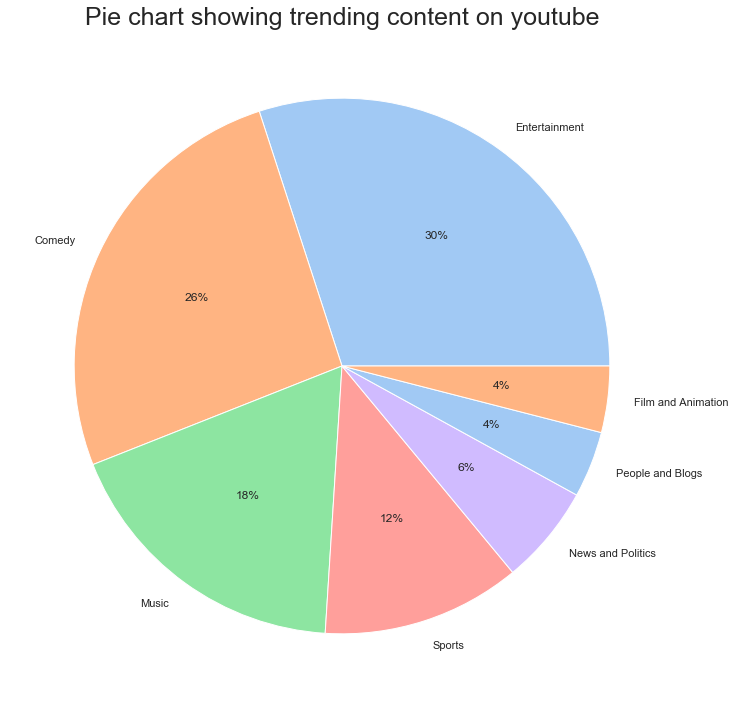

In [31]:
colors = sns.color_palette('pastel')[0:5]
plt.title("Pie chart showing trending content on youtube",fontsize=25)
plt.pie(vid_cat_freq_df["Frequency"], labels = vid_cat, colors = colors, autopct='%.0f%%')
plt.show()

## This pie chart further reinforce our insights as we can see that 30% of all content on the trending list were *Entertainment*

Text(0, 0.5, 'Frequency')

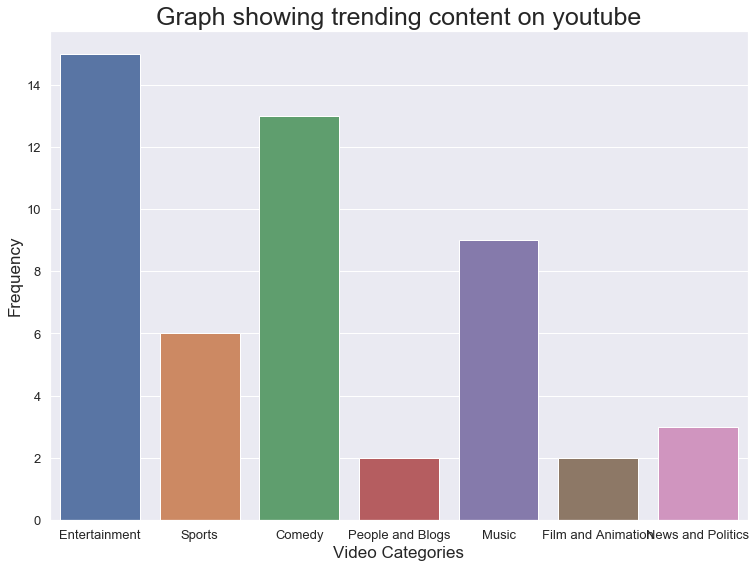

In [32]:
sns.set(rc={'figure.figsize':(12.5,9)})
plt.xticks(size=13)
plt.yticks(size=13)
my_plot = sns.countplot(x=data["categoryId"],orient="h")
my_plot.axes.set_title("Graph showing trending content on youtube",fontsize=25)
my_plot.set_xlabel("Video Categories",fontsize=17)
my_plot.set_ylabel("Frequency",fontsize=17)

## How many views per video categories

In [33]:
data.head(2)

,title,channelTitle,categoryId,liveBroadcastContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,dimension,definition,caption,licensedContent,projection,hrs_duration,min_duration,sec_duration,video_duration,publishedDATE,publishedTIME
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,APATATV+,Entertainment,none,559061.000000,4325.000000,401.000000,0.000000,415.000000,2d,hd,False,True,rectangular,1,4,43,01:04:43,2021-11-08,13:00:12
1,Liberia v Nigeria | FIFA World Cup Qatar 2022 ...,FIFATV,Sports,none,283842.000000,3558.000000,110.000000,0.000000,336.000000,2d,hd,False,True,rectangular,0,2,10,00:02:10,2021-11-13,18:38:29


In [34]:
views_and_cat_df = pd.DataFrame(data["viewCount"])
views_and_cat_df["channelTitle"] = data["channelTitle"]
views_and_cat_df["categoryId"] = data["categoryId"]

In [35]:
views_and_cat_df.head()

,viewCount,channelTitle,categoryId
0,559061.000000,APATATV+,Entertainment
1,283842.000000,FIFATV,Sports
2,659152.000000,Yorubaplus,Entertainment
3,447119.000000,BAKORI TV,Entertainment
4,660109.000000,official BRODA SHAGGI,Comedy


In [36]:
CategorySums = []
for i in views_and_cat_df["categoryId"].unique():
    CategorySums.append(views_and_cat_df.loc[views_and_cat_df["categoryId"]==i,"viewCount"].sum())

print(CategorySums)

[5332740.0, 17628974.0, 5922104.0, 401270.0, 20220965.0, 692121.0, 1427492.0]


In [37]:
pd.options.display.float_format = '{:,.0f}'.format
vid_cat_sums = pd.DataFrame(vid_cat,columns=["Categories"])
vid_cat_sums["CategorySums"] = CategorySums
vid_cat_sums.sort_values("CategorySums",ascending=False,inplace=True)
vid_cat_sums

,Categories,CategorySums
4,News and Politics,"20,220,965"
1,Comedy,"17,628,974"
2,Music,"5,922,104"
0,Entertainment,"5,332,740"
6,Film and Animation,"1,427,492"
5,People and Blogs,"692,121"
3,Sports,"401,270"


In [38]:
Channel_views = []
for i in views_and_cat_df["channelTitle"].unique():
    Channel_views.append(views_and_cat_df.loc[views_and_cat_df["channelTitle"]==i,"viewCount"].sum())

print(Channel_views)

[1501427.0, 283842.0, 966054.0, 447119.0, 1746215.0, 383661.0, 2734798.0, 401270.0, 397106.0, 412595.0, 123963.0, 692121.0, 369970.0, 856707.0, 107056.0, 473381.0, 296643.0, 2494417.0, 106378.0, 1222331.0, 336820.0, 1196204.0, 15369648.0, 78456.0, 1908670.0, 71647.0, 3877755.0, 7015831.0, 3085380.0, 948301.0, 231288.0, 72010.0, 64569.0, 159730.0, 164248.0, 748210.0, 279845.0]


In [39]:
channel_viewsCount_sum_df = pd.DataFrame(views_and_cat_df["channelTitle"].unique(),columns=["ChannelName"])
channel_viewsCount_sum_df["viewsCount_per_Channel"] = Channel_views
channel_viewsCount_sum_df.sort_values("viewsCount_per_Channel",ascending=False,inplace=True)
channel_viewsCount_sum_df.head()


,ChannelName,viewsCount_per_Channel
22,CKay,"15,369,648"
27,Manchester United,"7,015,831"
26,FC Barcelona,"3,877,755"
28,Larry Gaaga,"3,085,380"
6,SuperSport,"2,734,798"


Text(0, 0.5, 'Channel Name')

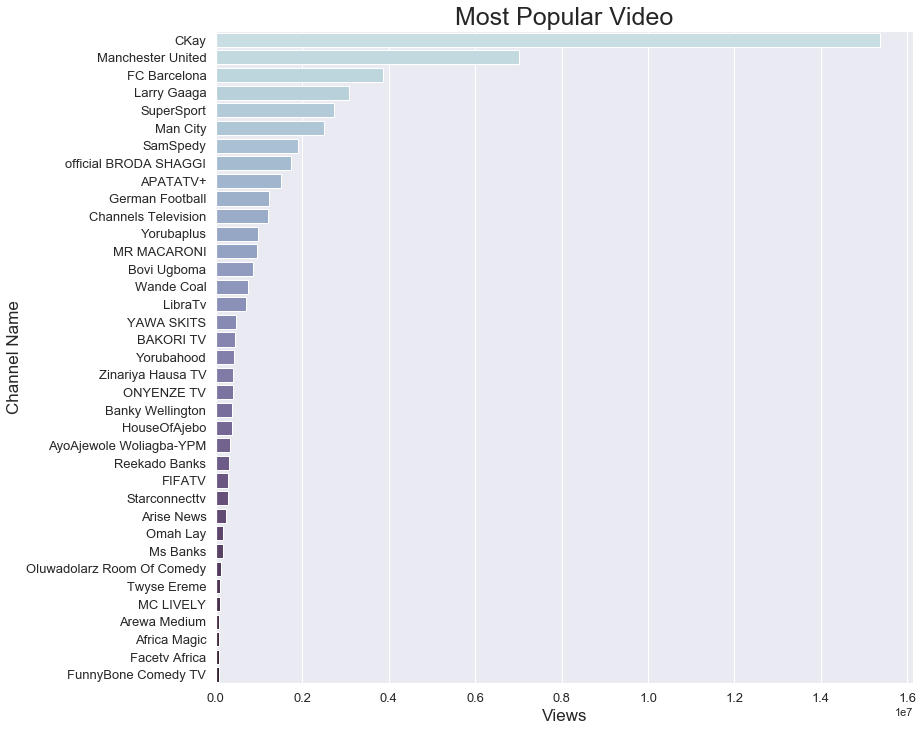

In [68]:
#draw a barchart of the above dataFrame
sns.set(rc={'figure.figsize':(12.5,12)})
plt.xticks(size=13)
plt.yticks(size=13)
bar_graph = sns.barplot(y="ChannelName", x="viewsCount_per_Channel", data=channel_viewsCount_sum_df,orient="h",palette="ch:s=.67,rot=-.45")
bar_graph.axes.set_title("Most Popular Video",fontsize=25)
bar_graph.set_xlabel("Views",fontsize=17)
bar_graph.set_ylabel("Channel Name",fontsize=17)

# CKAY had the most views on the trending videos list

In [40]:
#data.query("channelTitle == 'CKay'")
data.head()
#most interactions

interaction_df = pd.DataFrame([data["channelTitle"],data["categoryId"],data["likeCount"],data["dislikeCount"],data["commentCount"]]).T
print(interaction_df.shape)
interaction_df.head()


(50, 5)


,channelTitle,categoryId,likeCount,dislikeCount,commentCount
0,APATATV+,Entertainment,"4,325",401,415
1,FIFATV,Sports,"3,558",110,336
2,Yorubaplus,Entertainment,"5,825",411,653
3,BAKORI TV,Entertainment,"10,708",967,943
4,official BRODA SHAGGI,Comedy,"27,183",352,"1,740"


In [69]:
Channel_likes = []
Channel_dislikes = []
for i in interaction_df["channelTitle"].unique():
    Channel_likes.append(interaction_df.loc[interaction_df["channelTitle"]==i,"likeCount"].sum())
    Channel_dislikes.append(interaction_df.loc[interaction_df["channelTitle"]==i,"dislikeCount"].sum())

print(Channel_likes)
print(" ")
print(Channel_dislikes)

[51490.0, 3558.0, 7953.0, 10708.0, 28789.0, 36013.0, 39371.0, 7144.0, 25059.0, 3126.0, 5644.0, 54877.0, 10142.0, 191891.0, 6568.0, 15738.0, 9372.0, 35916.0, 4556.0, 22918.0, 5198.0, 706683.0, 3627.0, 36675.0, 730.0, 13369.0, 1844.0, 68086.0, 4392.0, 8577.0, 5016.0, 7526.0, 8218.0, 10673.0, 2472.0, 2223.0, 0]
 
[929.0, 110.0, 556.0, 967.0, 381.0, 159.0, 1377.0, 421.0, 711.0, 206.0, 37.0, 865.0, 218.0, 2173.0, 50.0, 249.0, 73.0, 1608.0, 34.0, 426.0, 354.0, 9628.0, 152.0, 430.0, 44.0, 144.0, 64.0, 1447.0, 157.0, 144.0, 585.0, 62.0, 126.0, 167.0, 159.0, 165.0, 0]


In [70]:
#the "views_and_cat_df["channelTitle"]" also the same as the ChannelName
likes_dislikes_df = pd.DataFrame(views_and_cat_df["channelTitle"].unique(),columns=["ChannelName"])
likes_dislikes_df["likesCount"] = Channel_likes
likes_dislikes_df["dislikeCount"] = Channel_dislikes
likes_dislikes_df.head()

,ChannelName,likesCount,dislikeCount
0,APATATV+,"51,490",929
1,FIFATV,"3,558",110
2,Yorubaplus,"7,953",556
3,BAKORI TV,"10,708",967
4,official BRODA SHAGGI,"28,789",381


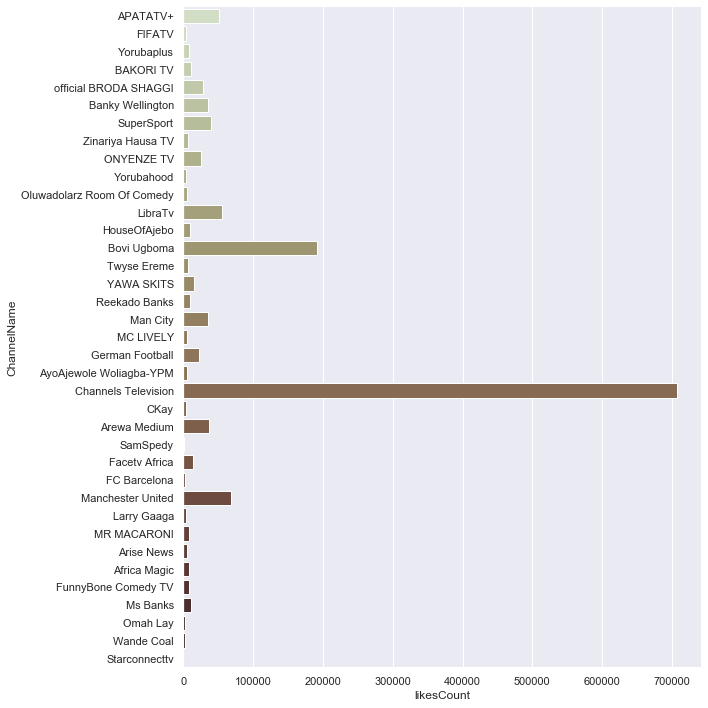

In [71]:
sns.catplot(y="ChannelName", x="likesCount", kind="bar", data=likes_dislikes_df,orient="h",palette="ch:.67",height=10)

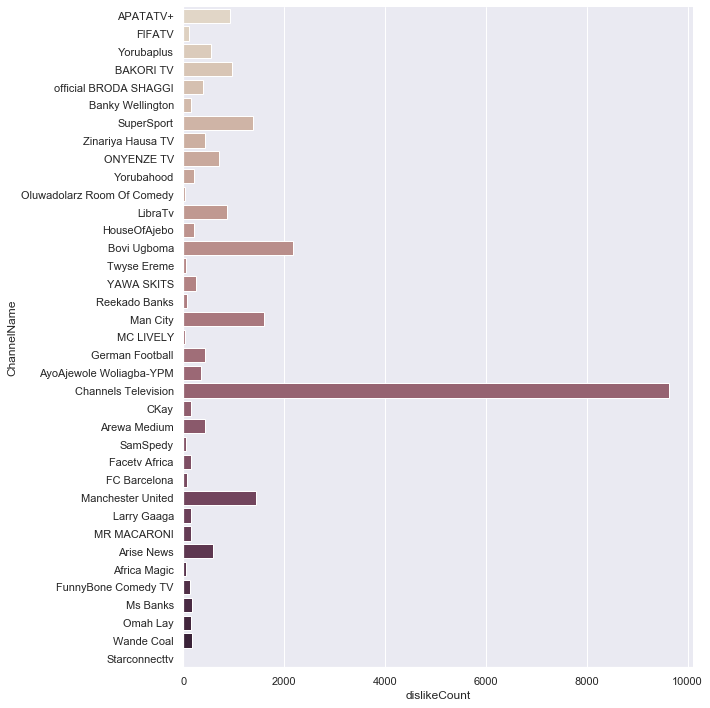

In [72]:
sns.catplot(y="ChannelName", x="dislikeCount", kind="bar", data=likes_dislikes_df,orient="h",palette="ch:.25",height=10)

# Channels TV had the most dislikes check this out with the number of views then see if you can find a relationship with the number of views and dislike and like count.. you can plot a line graph to show the trend

In [75]:
#VIDEO ENGAGEMENT PER VIDEOS
vid_engagement = pd.DataFrame(data["title"],columns=["videoTitle"])
vid_engagement["likeCount"] = data["likeCount"].unique()
vid_engagement["dislikeCount"] = data["dislikeCount"]
vid_engagement["views"]=data["viewCount"]
vid_engagement["commentCount"]=data["commentCount"]
vid_engagement["videoTitle"] = data["title"]
vid_engagement.head(1)

,videoTitle,likeCount,dislikeCount,views,commentCount
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,"4,325",401,"559,061",415


In [76]:
# dropped the null values to make calculations
vid_engagement.drop(48,inplace=True)
vid_engagement.tail()

,videoTitle,likeCount,dislikeCount,views,commentCount
43,Ms Banks – Party ft. Naira Marley (Official Vi...,"10,673",167,"159,730",880
44,Omah Lay - Free My Mind (Official Lyric Video),"2,472",159,"164,248",564
45,Wande Coal - Come My Way (Official Video),"2,223",165,"748,210",268
46,OBA BI OLORUN 2 Latest Yoruba Movie 2021Olamil...,"52,370",693,"332,636","3,417"
47,Ploy 2 Latest Yoruba Movie 2021 Drama Starring...,"2,128",145,"306,902",160


# So I am currently trying to calculate the average Like/Dislike ratio but I just realised that I have summed up the number of likes for each channel despite them having more than 1 post so I am meant to analyse per video

# I think i can make Channel_dislikes_df and Channel_likes_df just a table instead 

# Try to combine the average Like/Dislike ratio with the number of views on the video

In [77]:
vid_engagement['like_rate'] =  vid_engagement ['likeCount'] / vid_engagement['views'] * 100
vid_engagement['dislike_rate'] =  vid_engagement ['dislikeCount'] / vid_engagement['views'] * 100
vid_engagement['comment_rate'] =  vid_engagement ['commentCount'] / vid_engagement['views'] * 100

In [78]:
vid_engagement.head()

,videoTitle,likeCount,dislikeCount,views,commentCount,like_rate,dislike_rate,comment_rate
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,"4,325",401,"559,061",415,1,0,0
1,Liberia v Nigeria | FIFA World Cup Qatar 2022 ...,"3,558",110,"283,842",336,1,0,0
2,The Cokers Latest Yoruba Movie 2021 Drama Star...,"5,825",411,"659,152",653,1,0,0
3,IZZAR SO EPISODE 65 ORIGINAL,"10,708",967,"447,119",943,2,0,0
4,ONCE UPON A BAD DAY | BRODASHAGGI | CHIOMA AKP...,"27,183",352,"660,109","1,740",4,0,0


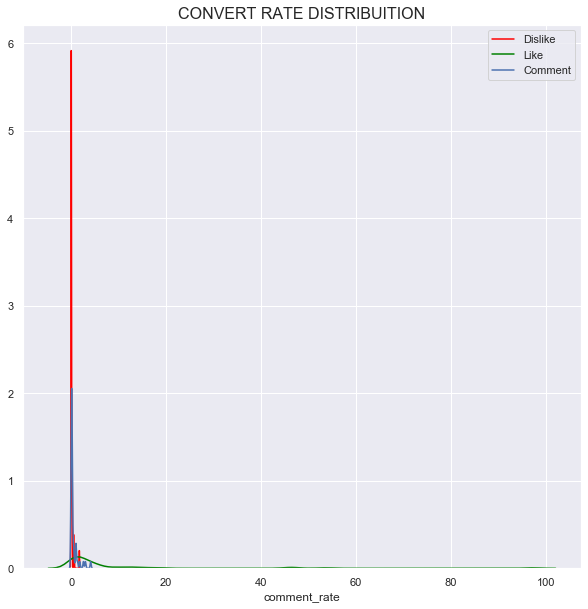

In [82]:
plt.figure(figsize = (10,10))

g1 = sns.distplot(vid_engagement['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(vid_engagement['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(vid_engagement['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

In [85]:
vid_engagement.head()

,videoTitle,likeCount,dislikeCount,views,commentCount,like_rate,dislike_rate,comment_rate
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,"4,325",401,"559,061",415,1,0,0
1,Liberia v Nigeria | FIFA World Cup Qatar 2022 ...,"3,558",110,"283,842",336,1,0,0
2,The Cokers Latest Yoruba Movie 2021 Drama Star...,"5,825",411,"659,152",653,1,0,0
3,IZZAR SO EPISODE 65 ORIGINAL,"10,708",967,"447,119",943,2,0,0
4,ONCE UPON A BAD DAY | BRODASHAGGI | CHIOMA AKP...,"27,183",352,"660,109","1,740",4,0,0


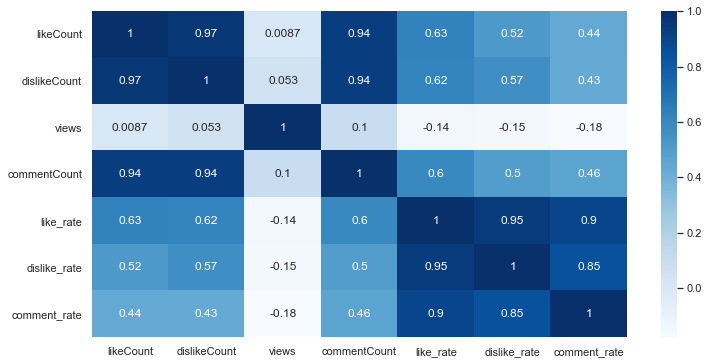

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(vid_engagement.corr(), annot=True, cmap='Blues')

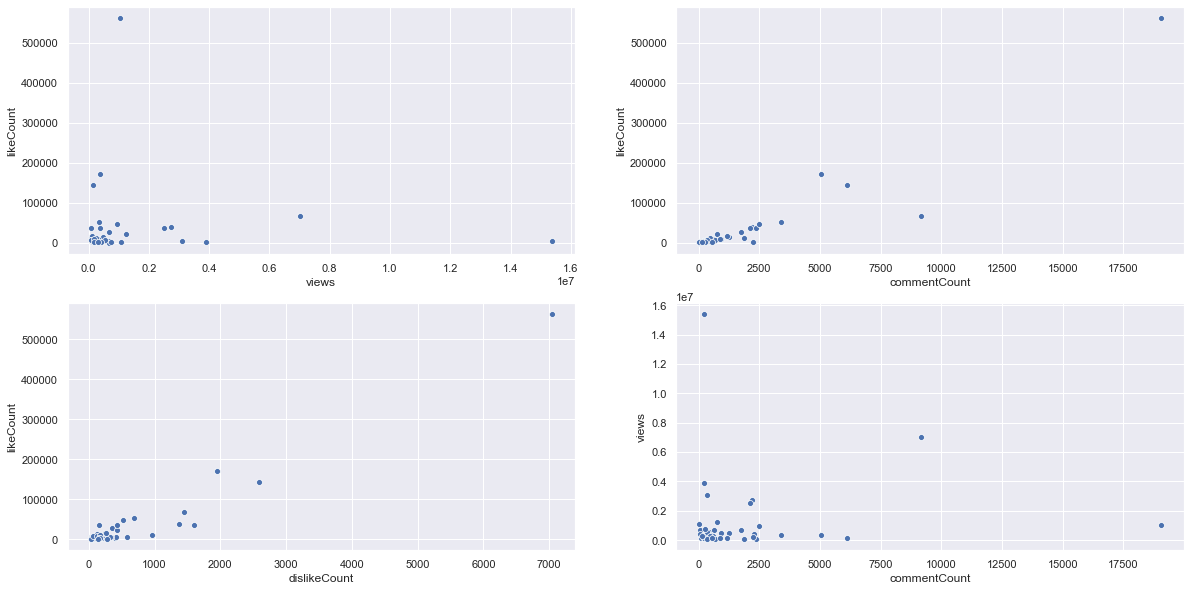

In [100]:
def Plot_corr(df):
    f,ax=plt.subplots(2,2,figsize=(20,10))
    
    sns.scatterplot(x='views',y='likeCount', data=df, ax=ax[0][0])
    sns.scatterplot(x='commentCount',y='likeCount', data=df, ax=ax[0][1])
    sns.scatterplot(x='dislikeCount',y='likeCount', data=df, ax=ax[1][0])
    sns.scatterplot(x='commentCount',y='views', data=df, ax=ax[1][1])

Plot_corr(vid_engagement)

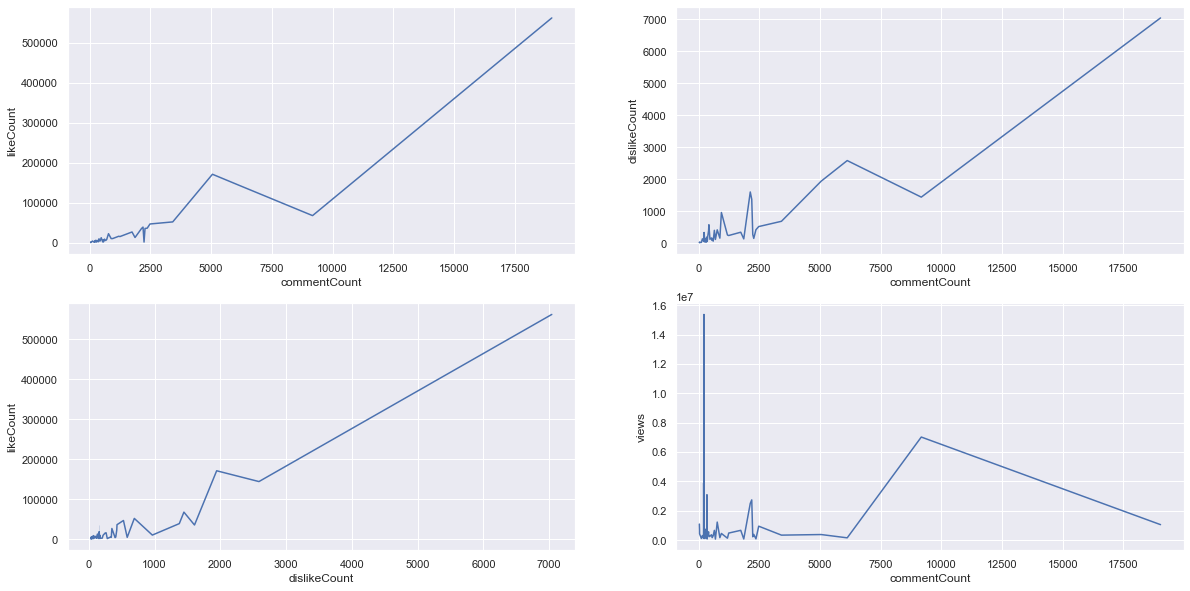

In [98]:
# sns.lineplot(x="dislikeCount",y="likeCount",data=vid_engagement)
def Plot_trend(df):
    f,ax=plt.subplots(2,2,figsize=(20,10))
    
    sns.lineplot(x='commentCount',y='likeCount', data=df, ax=ax[0][0])
    sns.lineplot(x='commentCount',y='dislikeCount', data=df, ax=ax[0][1])
    sns.lineplot(x='dislikeCount',y='likeCount', data=df, ax=ax[1][0])
    sns.lineplot(x='commentCount',y='views', data=df, ax=ax[1][1])

Plot_trend(vid_engagement)

# So as we can see that the Correlation plot, Line Plot and Scatter Plot all showed the trend in the data, and we can see that there is a Positive correlation between the number of likes,dislikes and comments made on a video and this tells us why the bar chart looked the way it is.

# ANALYSIS OF THE "TAG" and "DESCRIPTION" Column

In [103]:
desc_Tags_df = pd.read_csv("Youtube_Trending_data_15thNov.csv")
desc_Tags_df.head()

,title,description,channelTitle,tags,categoryId,liveBroadcastContent,defaultLanguage,defaultAudioLanguage,viewCount,likeCount,...,definition,caption,licensedContent,projection,hrs_duration,min_duration,sec_duration,video_duration,publishedDATE,publishedTIME
0,Golo 3 Latest Yoruba Movie 2021 Drama Starring...,Fortified by terrestrial powers and feared by ...,APATATV+,'latest yoruba movie 2021 new release this wee...,Entertainment,none,en,yo,"559,061","4,325",...,hd,False,True,rectangular,1,4,43,01:04:43,2021-11-08,13:00:12
1,Liberia v Nigeria | FIFA World Cup Qatar 2022 ...,Victor Osimhen and Ahmed Musa both struck from...,FIFATV,"'Football', 'FIFA', 'official', 'Soccer', 'Fut...",Sports,none,en,en,"283,842","3,558",...,hd,False,True,rectangular,0,2,10,00:02:10,2021-11-13,18:38:29
2,The Cokers Latest Yoruba Movie 2021 Drama Star...,A gripping story about a famous and wealthy in...,Yorubaplus,"'latest yoruba movies 2021 new release', 'yoru...",Entertainment,none,yo,yo,"659,152","5,825",...,hd,False,True,rectangular,1,32,54,01:32:54,2021-11-05,09:30:01
3,IZZAR SO EPISODE 65 ORIGINAL,Wannan Channel Bakori tv Zata Rika Kawo Muku S...,BAKORI TV,"'Broda Shaggi', 'BrodaShaggi', 'Fine boy Agber...",Entertainment,none,en,en-GB,"447,119","10,708",...,hd,False,True,rectangular,0,42,6,00:42:06,2021-11-07,18:58:10
4,ONCE UPON A BAD DAY | BRODASHAGGI | CHIOMA AKP...,Please SUBSCRIBE to Broda Shaggi Official YouT...,official BRODA SHAGGI,"'SuperSport', 'SuperSport live', 'supersport t...",Comedy,none,en,en-GB,"660,109","27,183",...,hd,False,True,rectangular,0,11,39,00:11:39,2021-11-03,23:00:13


In [113]:
from wordcloud import WordCloud, STOPWORDS 
from tqdm import tqdm
import string

In [114]:
def Show_Wordcolud(df,content_category):
    print('This may take some Time :-)')
    if len(content_category) !=4:
        raise ValueError('Incomplete List to Plot. Expected len:4,got:{}'.format(len(content_category)))
    else:
        
        f,ax=plt.subplots(2,2, figsize=(26,20))
        i=0
        for content in tqdm(content_category):
            mylist=df[df.title==str(content)].title.apply(lambda x: x.split())
            mylist = [x for y in mylist for x in y]
            mylist=[x for x in mylist if x not in string.punctuation]
            unique_string=(" ").join(mylist)
            wordcloud = WordCloud(width=1400, height=1200, background_color='white', max_words=180).generate(unique_string)
            ax[i//2][i%2].grid(False)
            ax[i//2][i%2].set_title("WordCloud if Titles in '{}' video content".format(content),fontsize=20)
            ax[i//2][i%2].imshow(wordcloud, aspect='auto')
            i+=1
        plt.show()
 

This may take some Time :-)


100%|██████████| 4/4 [00:09<00:00,  2.42s/it]


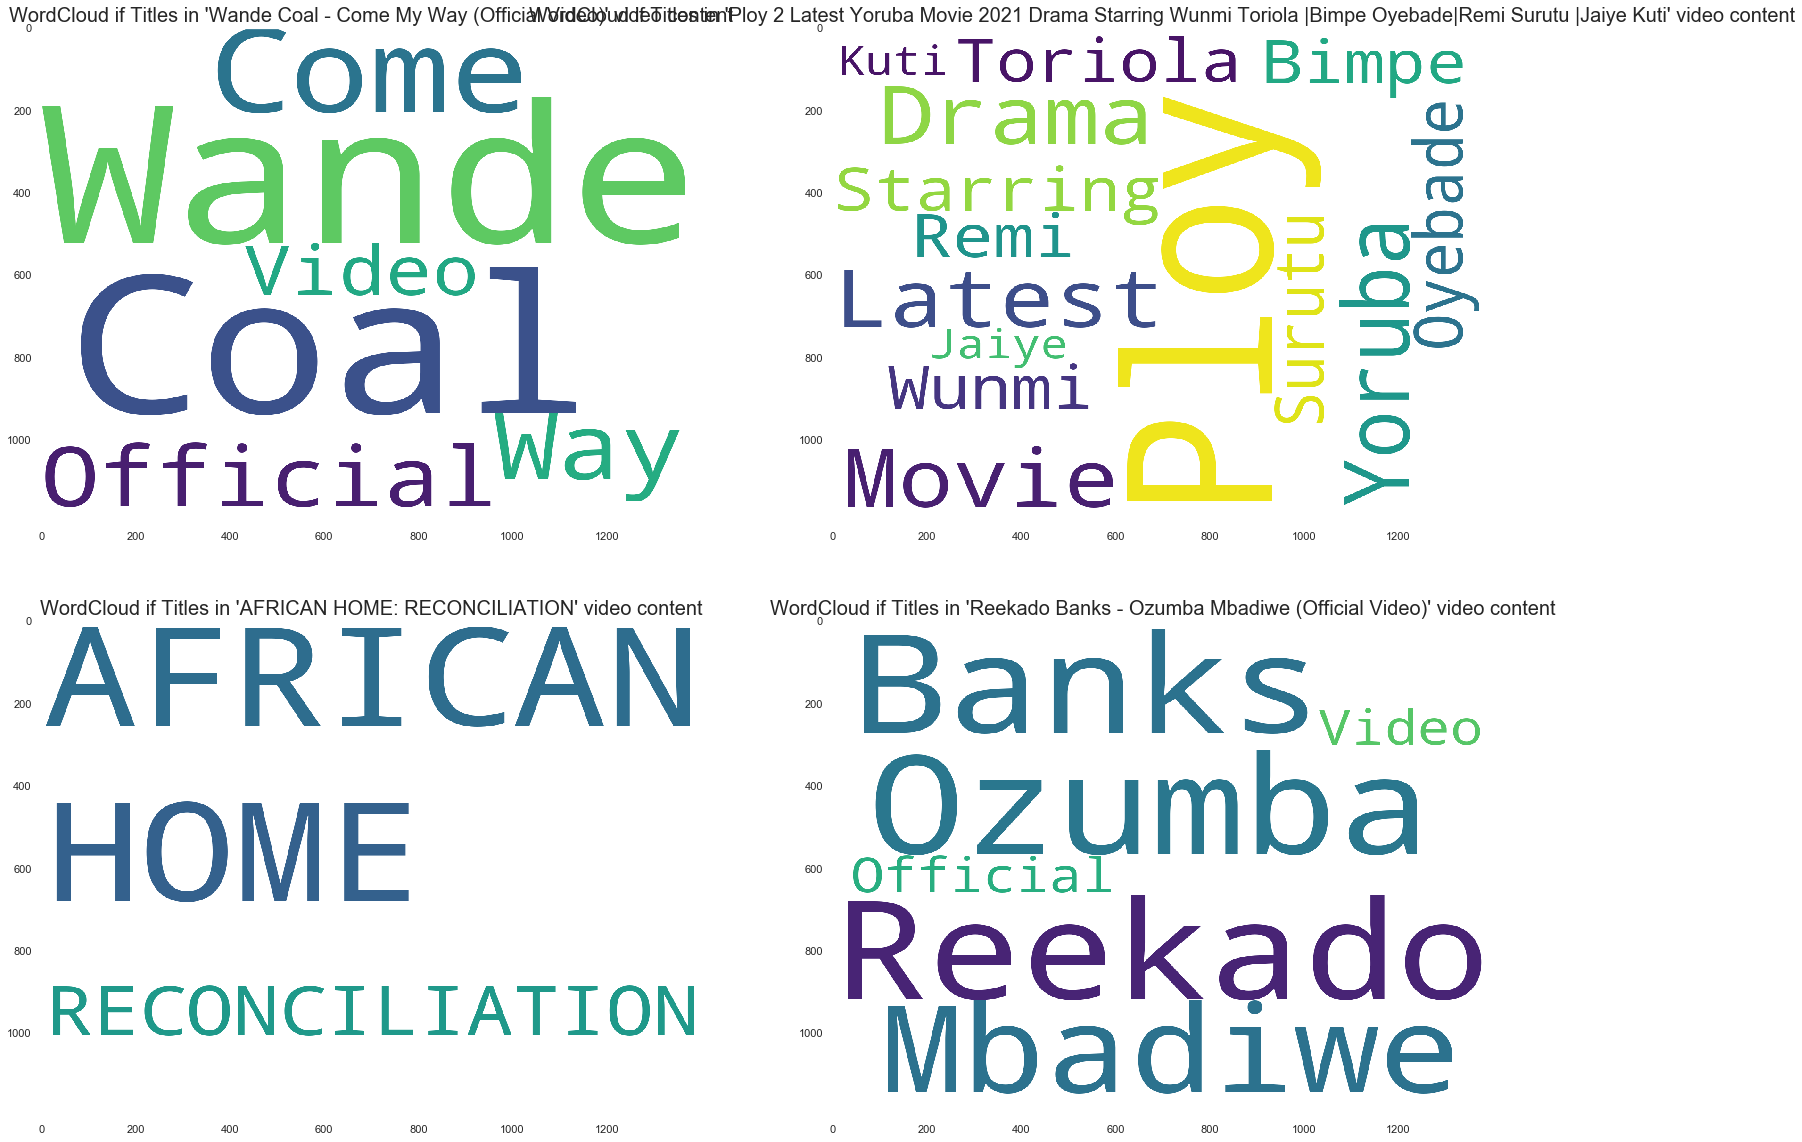

In [115]:
Show_Wordcolud(desc_Tags_df,desc_Tags_df.title.value_counts().index[:4].to_list())

In [116]:
desc_Tags_df.sample()

,title,description,channelTitle,tags,categoryId,liveBroadcastContent,defaultLanguage,defaultAudioLanguage,viewCount,likeCount,...,definition,caption,licensedContent,projection,hrs_duration,min_duration,sec_duration,video_duration,publishedDATE,publishedTIME
7,A DUNIYA KASHI 44,NaN,Zinariya Hausa TV,"'african movies', 'african videos', 'akpuruakp...",People and Blogs,none,en,yo,"158,661","4,987",...,hd,False,True,rectangular,0,34,57,00:34:57,2021-11-11,19:00:12


In [117]:
def Show_Wordcolud_Tags(df,content_category):
    print('This may take some Time :-)')
    if len(content_category) !=4:
        raise ValueError('Incomplete List to Plot. Expected len:4,got:{}'.format(len(content_category)))
    else:
        
        f,ax=plt.subplots(2,2, figsize=(26,20))
        i=0
        for content in tqdm(content_category):
            mylist=df[df.tags==str(content)].title.apply(lambda x: x.split())
            mylist = [x for y in mylist for x in y]
            mylist=[x for x in mylist if x not in string.punctuation]
            unique_string=(" ").join(mylist)
            wordcloud = WordCloud(width=1400, height=1200, background_color='white', max_words=180).generate(unique_string)
            ax[i//2][i%2].grid(False)
            ax[i//2][i%2].set_title("WordCloud if Titles in '{}' video content".format(content),fontsize=20)
            ax[i//2][i%2].imshow(wordcloud, aspect='auto')
            i+=1
        plt.show()
 

This may take some Time :-)


100%|██████████| 4/4 [00:09<00:00,  2.38s/it]


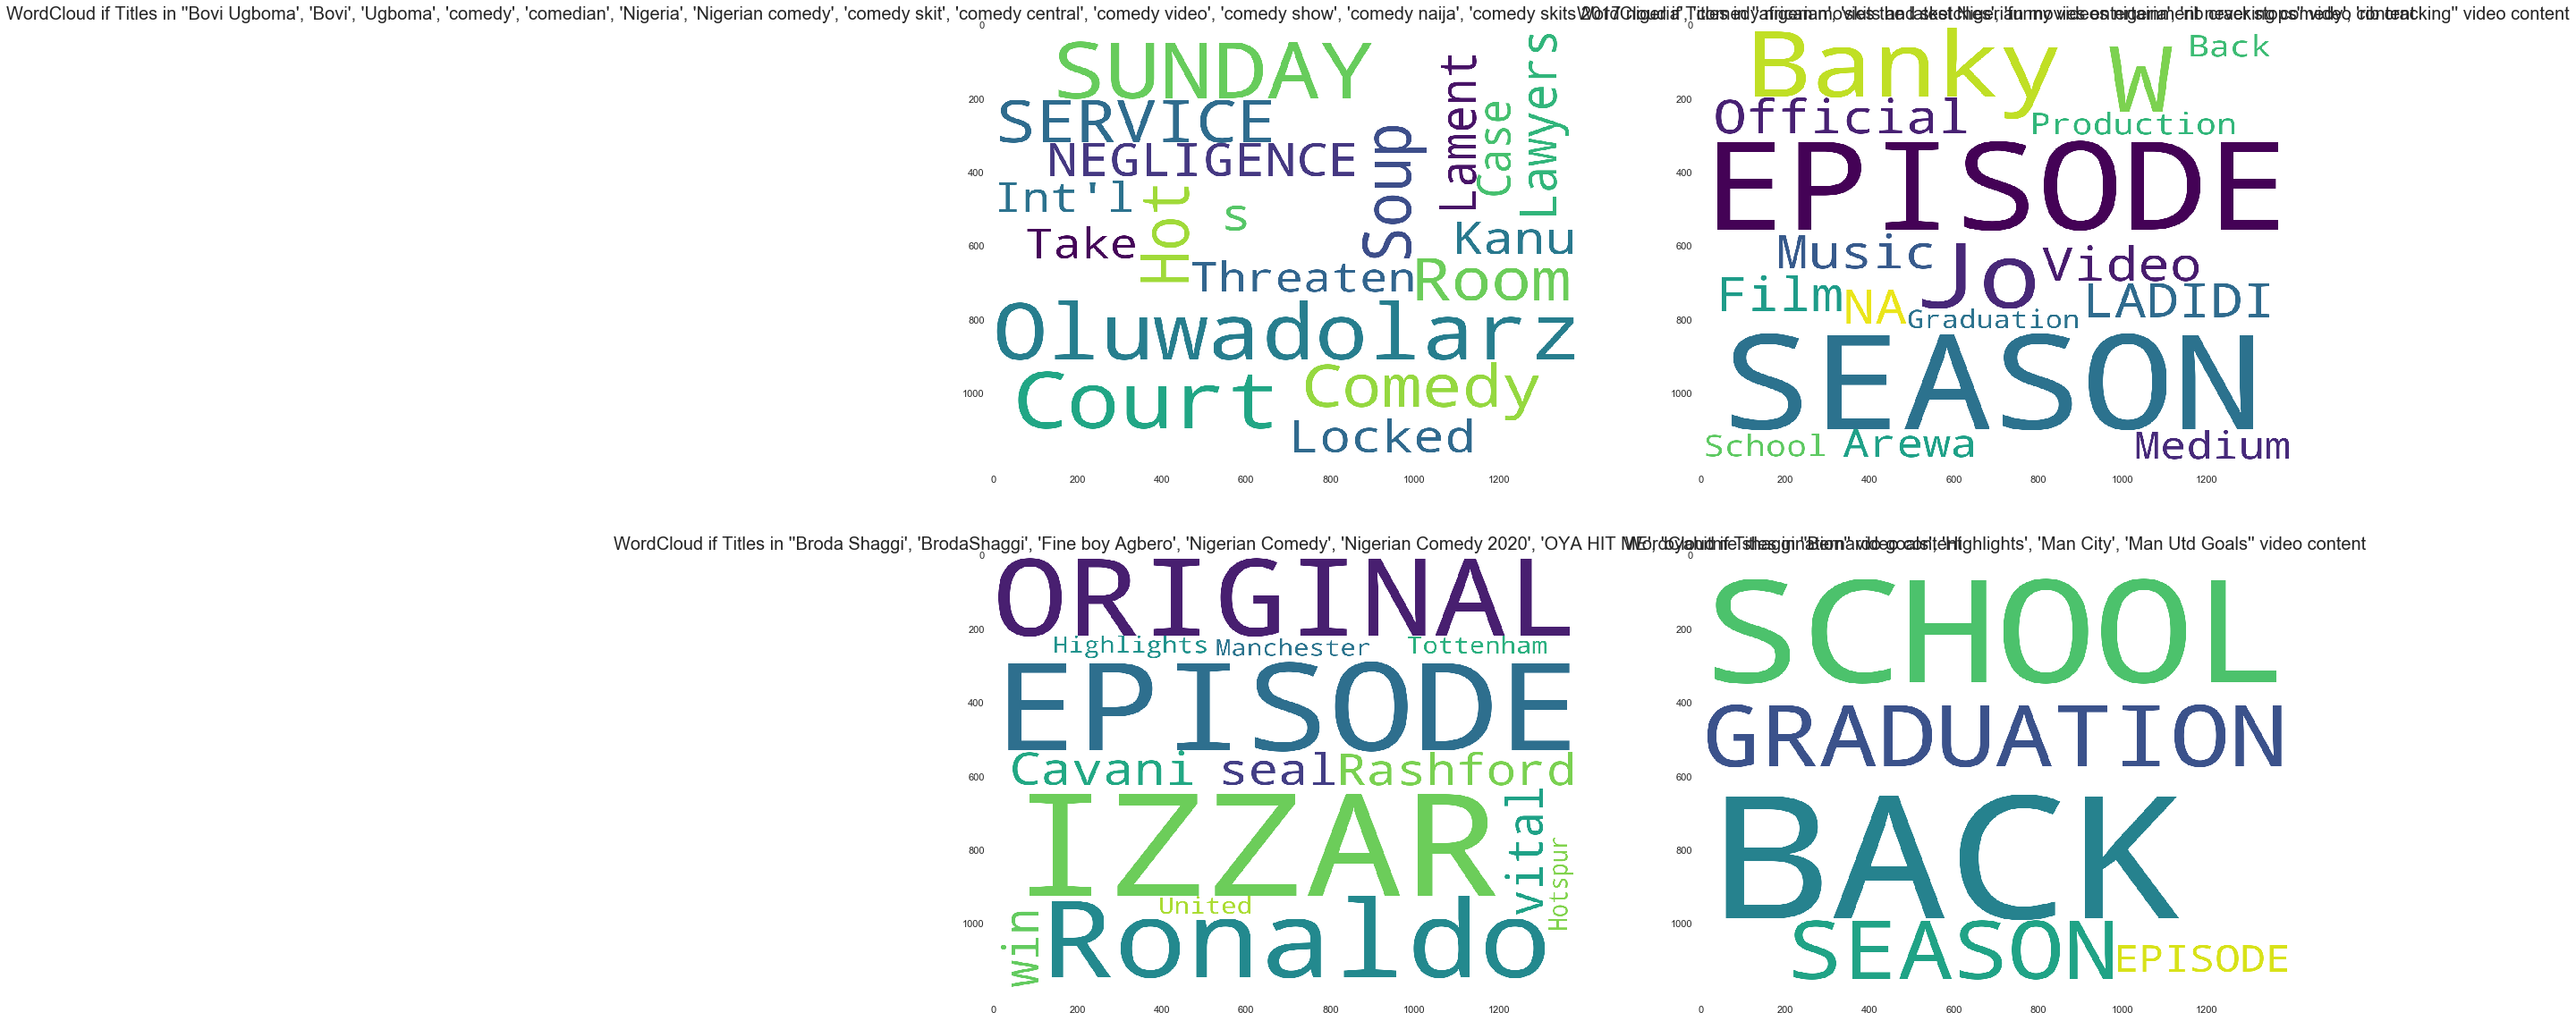

In [118]:
Show_Wordcolud_Tags(desc_Tags_df,desc_Tags_df.tags.value_counts().index[:4].to_list())

In [120]:
print("dad")

dad
